# Car Price Prediction Data Visualizing and Data Modeling

#### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Reading Dataset

In [3]:
cardf = pd.read_csv("CarPrice_Assignment.csv")
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Cleansing
#### Checking Dublicates

In [4]:
if sum(cardf.duplicated(subset = 'car_ID')) == 0:
    print("No Duplicates data is clean")
else:
    print("Duplicates")

No Duplicates data is clean


#### Checking Null Values

In [5]:
if any(cardf.isnull().sum()):
    print("Null values exist")
else:
    print("No Null values Data is clean")

No Null values Data is clean


### Univariate Analysis

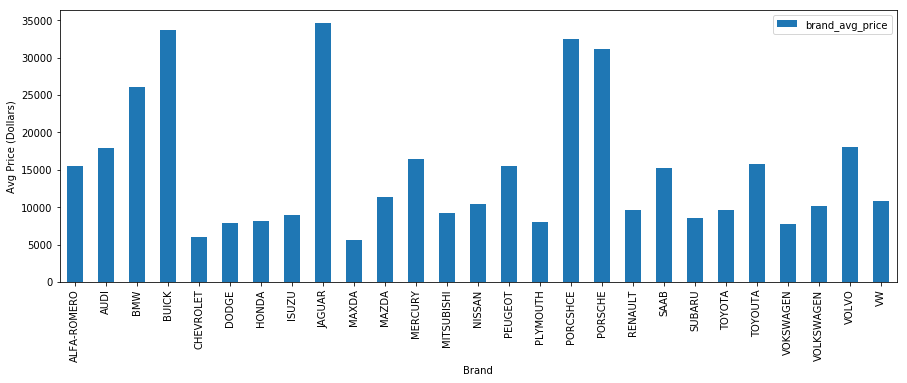

Above graph shows Avg Price of each company


In [7]:
cardf['brand'] = cardf.CarName.str.split(' ').str.get(0).str.upper()
cardf['mileage'] = cardf['citympg']*0.55 + cardf['highwaympg']*0.45
df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
cardf = cardf.merge(df_comp_avg_price, on = 'brand')
cardf['brand_category'] = cardf['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 else ("Mid_Range" if 10000 <= x < 20000 else "Luxury"))



df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = True, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

print("Above graph shows Avg Price of each company")


#### engine size VS price

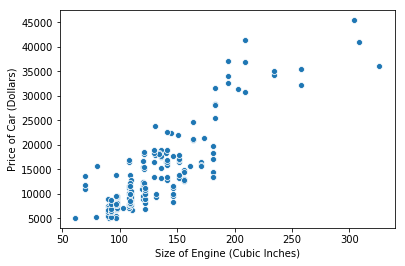

In [16]:
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = cardf)
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Bore ratio VS price

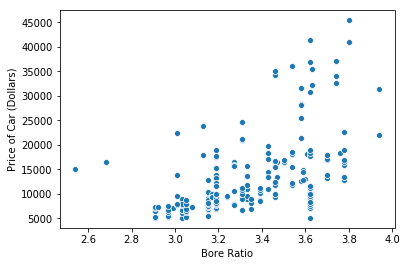

In [17]:
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = cardf)
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Stroke vs price

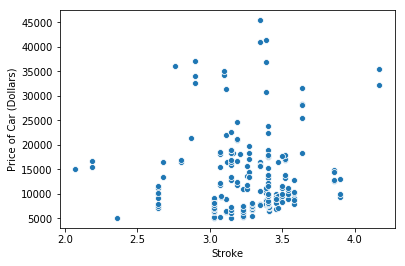

In [18]:
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = cardf)
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Compression Ratio

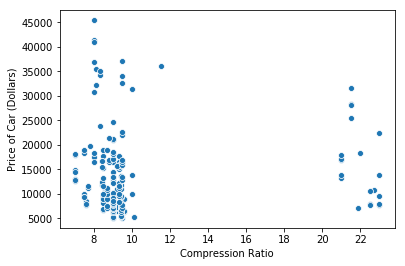

In [9]:
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = cardf)
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
plt.show()

#### peakRpm vs price

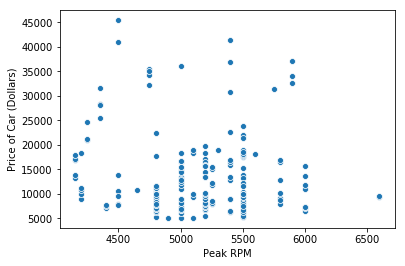

In [10]:
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = cardf)
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Wheelbase VS price

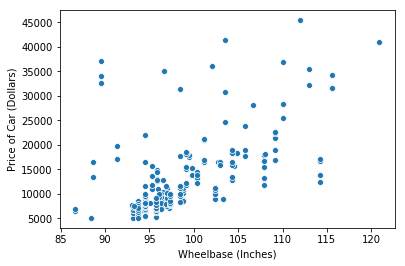

In [12]:
plt9 = sns.scatterplot(x = 'wheelbase', y = 'price', data = cardf)
plt9.set_xlabel('Wheelbase (Inches)')
plt9.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Mileage VS price

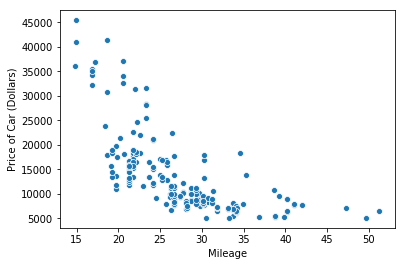

Size of Engine, bore ratio,wheelbase has positive correlation with price


In [17]:
plt6 = sns.scatterplot(x = 'mileage', y = 'price', data = cardf)
plt6.set_xlabel('Mileage')
plt6.set_ylabel('Price of Car (Dollars)')
plt.show()    
print("Size of Engine, bore ratio,wheelbase has positive correlation with price")

#### Engine Type VS price

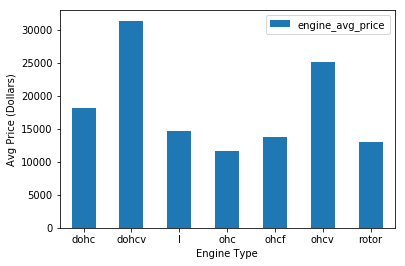

In [14]:
df_engine_avg_price = cardf[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = True)
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Num of Cylinder VS price

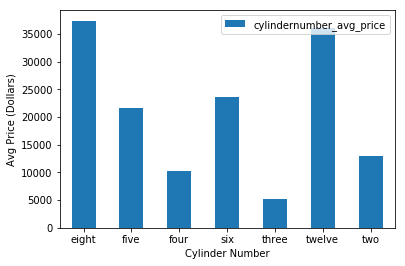

In [15]:
df_cylindernumber_avg_price = cardf[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

#### Fuel system VS price

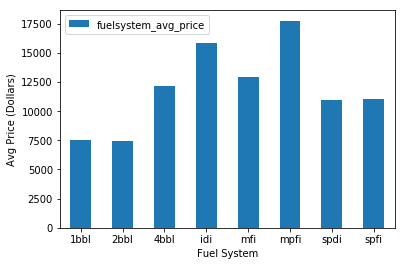

DOHCV and OHCV engine types are priced high, Eight and twelve cylinder cars have higher price, IDI and MPFI fuel system have higher price.


In [18]:
df_fuelsystem_avg_price = cardf[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()  


print("DOHCV and OHCV engine types are priced high, Eight and twelve cylinder cars have higher price, IDI and MPFI fuel system have higher price.")  

#### aspiration VS price

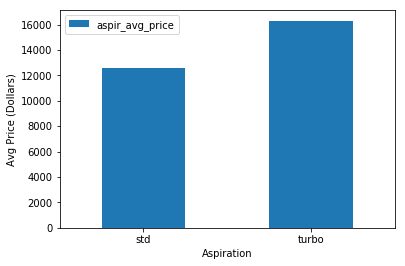

It can be seen that turbo aspiration have more Avg price than std


In [20]:
df_aspir_avg_price = cardf[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()
print("It can be seen that turbo aspiration have more Avg price than std")

#### Fuel type VS price

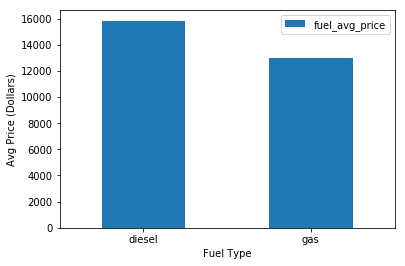

It can be seen that that diesel cars are more expensive than gas cars


In [21]:
df_fuel_avg_price = cardf[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

print("It can be seen that that diesel cars are more expensive than gas cars")

#### Car Body VS price

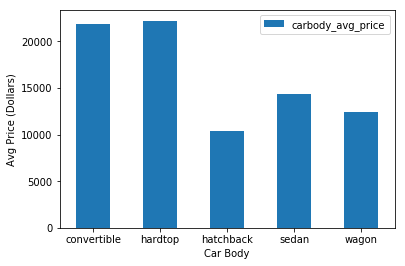

Hardtop and convertible are the most expensive so Price is depended on car body


In [22]:
df_body_avg_price = cardf[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 


print("Hardtop and convertible are the most expensive so Price is depended on car body")

#### Drive wheel VS price

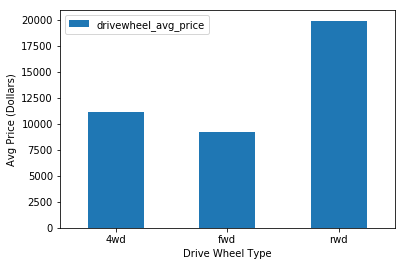

In [23]:
df_drivewheel_avg_price = cardf[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = True,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Horse power VS price

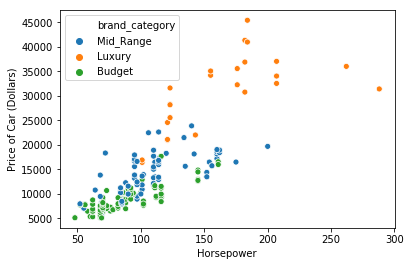

In [24]:
plt8 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = cardf)
plt8.set_xlabel('Horsepower')
plt8.set_ylabel('Price of Car (Dollars)')
plt.show()

### Car Dimensions VS price

#### length, height , width , Weight

Length width and weight of the car is positively related with the price.


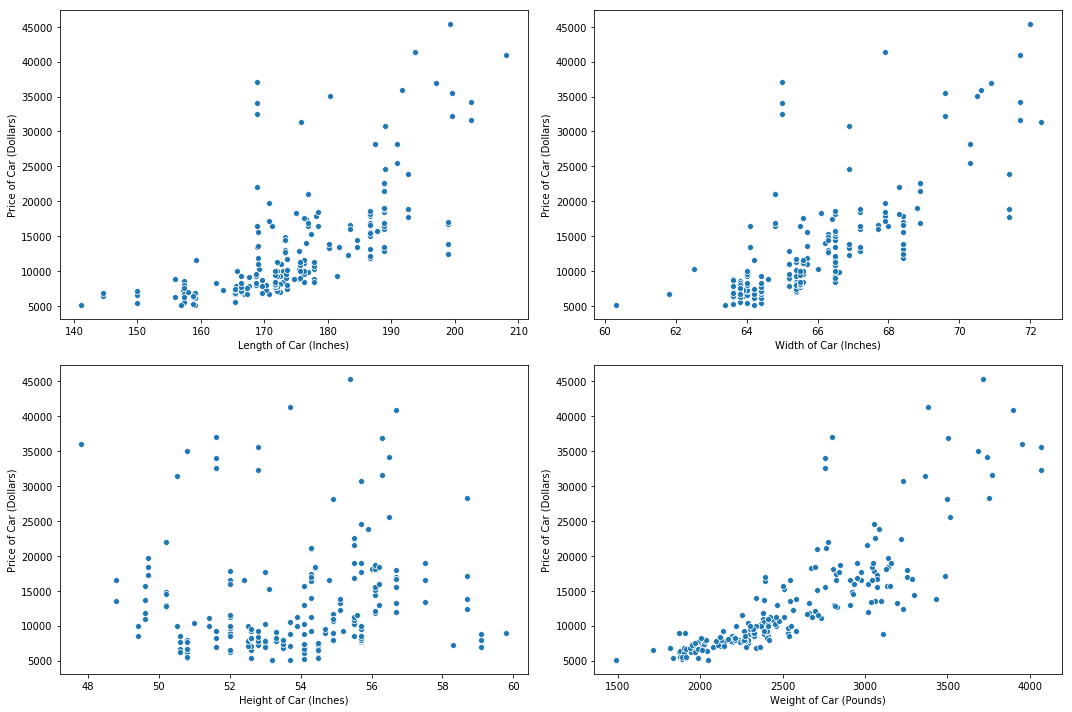

In [26]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = cardf, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')



plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = cardf, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')



plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = cardf, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')



plt4 = sns.scatterplot(x = 'curbweight', y = 'price', data = cardf, ax = axs[1,1])
plt4.set_xlabel('Weight of Car (Pounds)')
plt4.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

print("Length width and weight of the car is positively related with the price.")

## Data Attribute selection on basis of Dependency shown above

In [8]:
print("Dependent Variables finalized")

auto = cardf[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

Dependent Variables finalized


### Changing Categorical in Numerical using Dummy variables

In [9]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)


drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,...,1,0,0,1,0,1,0,0,0,1
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,...,0,0,1,0,0,0,1,0,0,1
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,...,0,0,0,0,0,0,1,0,0,1


### Droping useless attributes

In [10]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,0,0,1,0,0,1


### Split Data and Set role

In [11]:
x = auto.drop(['price'],axis=1)
y = auto['price']
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.35)

## Linear Regression

Text(0, 0.5, 'Predictions')

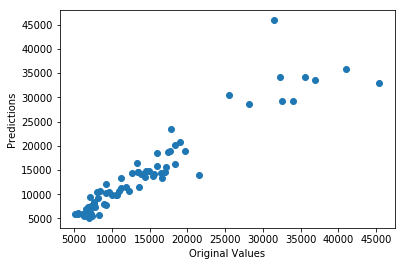

In [12]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)


plt.scatter(Y_test, predictions)
plt.xlabel("Original Values")
plt.ylabel("Predictions")

In [13]:
tscore = lm.score(X_test,Y_test)
print("Score : ",tscore)

Score :  0.8863191460155235


In [14]:
taccuracy = tscore * 100
print("Accuracy : ",taccuracy)

Accuracy :  88.63191460155235


### Cross Validation

In [40]:
score = cross_val_score(lm,x,y,cv=4)
print("Avg cross validation score : ",score.sum()/4)

Avg cross validation score :  0.6878900096820568


## Random Forest

Text(0, 0.5, 'Predictions')

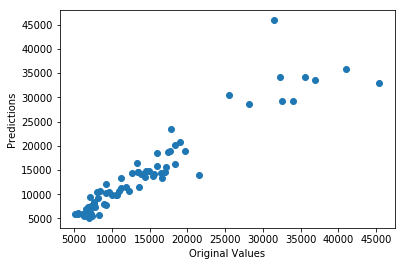

In [34]:
regr = RandomForestRegressor(max_depth=7,random_state=10,n_estimators=100)
regr.fit(X_train,Y_train)

plt.scatter(Y_test, predictions)
plt.xlabel("Original Values")
plt.ylabel("Predictions")

In [35]:
tscore = regr.score(X_test,Y_test)
print("Score : ",tscore)

Score :  0.942424126335854


In [36]:
taccuracy = tscore * 100
print("Accuracy : ",taccuracy)

Accuracy :  94.2424126335854


### Cross Validation

In [41]:
score = cross_val_score(regr,x,y,cv=4)
print("Avg cross validation score : ",score.sum()/4)

Avg cross validation score :  0.8388547873037469
